In [285]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ff1.Cache.enable_cache('../cache')
pd.options.mode.chained_assignment = None

In [286]:
team = 'Alpine'
driver_1 = 'OCO'
driver_2 = 'GAS'

plt.style.use('dark_background')

In [287]:
event = ff1.get_event(2024, 3)

In [288]:
import os

# Set your desired directory path here
directory_path = "./" + str(event.year) + "/" + event.Location + "/qualifying"

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' was created.")
else:
    print(f"Directory '{directory_path}' already exists.")


Directory './2024/Melbourne/qualifying' was created.


In [289]:
q = event.get_qualifying()
q.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            IN

In [290]:
corners = q.get_circuit_info().corners['Distance']

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


# Comparison of team drivers

In [602]:
q1.pick_driver('HUL')

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
272,0 days 00:17:02.841000,HUL,27,NaT,1.0,1.0,0 days 00:15:24.267000,NaT,NaT,0 days 00:00:19.683000,...,True,Haas F1 Team,0 days 00:15:24.267000,2024-03-23 05:00:25.655,1,NaN,False,,False,False
273,0 days 00:18:20.833000,HUL,27,0 days 00:01:17.992000,2.0,1.0,NaT,NaT,0 days 00:00:27.126000,0 days 00:00:17.544000,...,True,Haas F1 Team,0 days 00:17:02.841000,2024-03-23 05:02:04.229,1,NaN,False,,False,True
274,0 days 00:20:05.637000,HUL,27,0 days 00:01:44.804000,3.0,1.0,NaT,NaT,0 days 00:00:37.318000,0 days 00:00:22.407000,...,True,Haas F1 Team,0 days 00:18:20.833000,2024-03-23 05:03:22.221,1,NaN,False,,False,True
275,0 days 00:21:23.744000,HUL,27,0 days 00:01:18.107000,4.0,1.0,NaT,NaT,0 days 00:00:27.100000,0 days 00:00:17.515000,...,True,Haas F1 Team,0 days 00:20:05.637000,2024-03-23 05:05:07.025,1,NaN,False,,False,True
276,0 days 00:29:31.108000,HUL,27,NaT,5.0,1.0,NaT,0 days 00:22:55.471000,0 days 00:00:32.991000,0 days 00:00:19.423000,...,True,Haas F1 Team,0 days 00:21:23.744000,2024-03-23 05:06:25.132,1,NaN,False,,False,False
277,0 days 00:31:01.964000,HUL,27,0 days 00:01:30.856000,6.0,2.0,0 days 00:29:33.145000,NaT,0 days 00:00:35.620000,0 days 00:00:19.431000,...,True,Haas F1 Team,0 days 00:29:31.108000,2024-03-23 05:14:32.496,1,NaN,False,,False,False
278,0 days 00:32:19.940000,HUL,27,0 days 00:01:17.976000,7.0,2.0,NaT,NaT,0 days 00:00:26.782000,0 days 00:00:17.617000,...,True,Haas F1 Team,0 days 00:31:01.964000,2024-03-23 05:16:03.352,1,NaN,False,,False,True
279,0 days 00:33:54.262000,HUL,27,NaT,8.0,2.0,NaT,0 days 00:33:54.262000,0 days 00:00:35.293000,0 days 00:00:19.700000,...,True,Haas F1 Team,0 days 00:32:19.940000,2024-03-23 05:17:21.328,1,NaN,False,,False,False


In [291]:
laps_team = q.laps.pick_team(team)
laps_d1 = laps_team.pick_driver(driver_1)
laps_d2 = laps_team.pick_driver(driver_2)

In [597]:
laps_d1.pick_quicklaps()['LapTime'].dt.total_seconds().to_list()

[78.659, 78.217, 77.617, 78.816, 78.012, 77.697]

In [598]:
laps_d2.pick_quicklaps()['LapTime'].dt.total_seconds().to_list()

[78.554, 77.982, 78.088]

In [292]:
print("Fastest D1 : ", laps_d1.pick_fastest()['LapTime'])
print("Fastest D2 : ", laps_d2.pick_fastest()['LapTime'])

Fastest D1 :  0 days 00:01:17.617000
Fastest D2 :  0 days 00:01:17.982000


In [591]:
laps_d2.pick_quicklaps().iloc[-1]['LapTime'] - laps_d1.pick_fastest()['LapTime']

Timedelta('0 days 00:00:00.471000')

In [592]:
laps_d2.pick_fastest()['LapTime'] - laps_d1.pick_fastest()['LapTime']

Timedelta('0 days 00:00:00.365000')

In [537]:
# Telemetry comparison
from fastf1 import utils

deltas, tel_d1, tel_d2 = utils.delta_time(
    laps_d1.pick_fastest(),
    #laps_d2.pick_fastest()
    laps_d2.pick_quicklaps().iloc[-1]
)

print("WARNING PICKING LAST LAP NOT FASTEST !!!!!")

WARNING PICKING LAST LAP NOT FASTEST !!!!!


/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


In [538]:
tel_d1['Time'] = tel_d1['Time'].dt.total_seconds()
tel_d2['Time'] = tel_d2['Time'].dt.total_seconds()

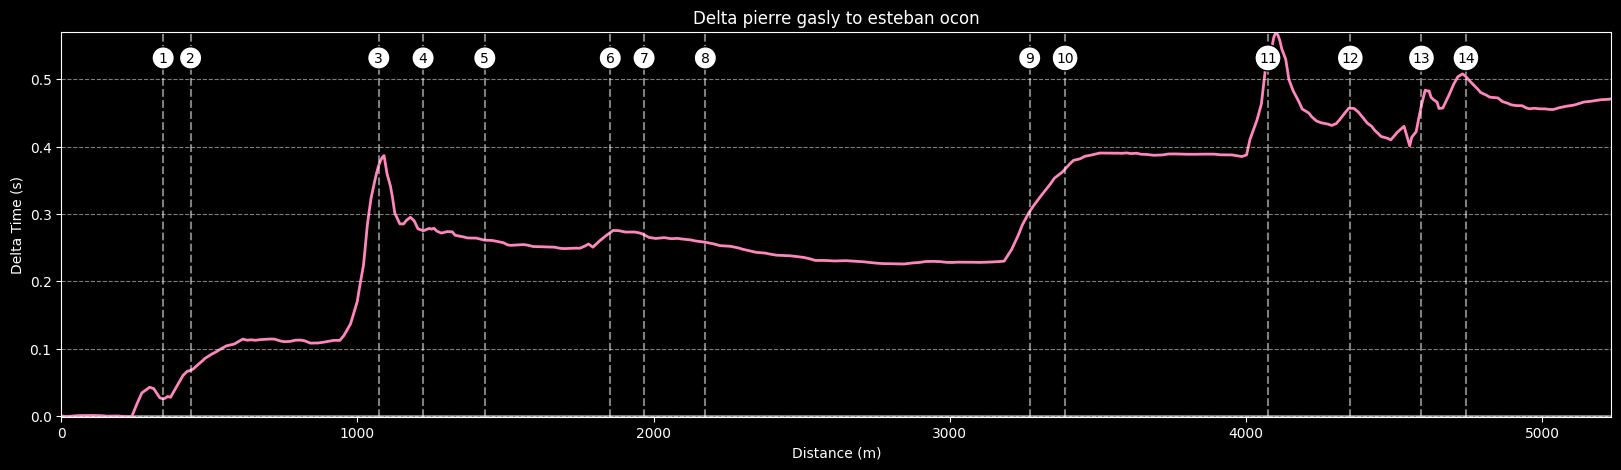

In [539]:
import matplotlib.pyplot as plt
import pandas as pd
from fastf1 import plotting

fig = plt.figure(figsize=(20, 5))
ax = plt.subplot()

min_y = min(deltas)
max_y = max(deltas)

max_x = max(tel_d1['Distance'])

ax.plot(
    tel_d1['Distance'],
    deltas,
    color=plotting.driver_color(driver_2),
    linewidth=2,
    zorder=1
)

i = 1
for corner_distance in corners:
    ax.vlines(corner_distance, min_y, max_y, linestyles='dashed', alpha=0.5)
    ax.text(
        corner_distance,
        max_y * 0.95,
        f'{i}',
        color='black',
        verticalalignment='top',
        horizontalalignment='center',
        bbox=dict(facecolor='white', alpha=1, boxstyle='circle', edgecolor='black')
        )
    i += 1

ax.hlines(0, 0, max_x, zorder=-1, alpha=0.5)

ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Delta Time (s)')
ax.set_xlim(0, max_x)
ax.set_ylim(min_y, max_y)
plt.title('Delta ' + plotting.DRIVER_TRANSLATE[driver_2] + ' to ' + plotting.DRIVER_TRANSLATE[driver_1])
plt.savefig(directory_path + '/internal_delta', bbox_inches = "tight")
plt.show()

In [540]:
import matplotlib.pyplot as plt
import pandas as pd
from fastf1 import plotting

def plot_lap_telemetry(data_d1, data_d2, column, ax = None, min_distance = -np.Infinity, max_distance = np.Infinity, y_padding = 0, d1_color = 'cornflowerblue', d2_color = 'crimson', file_name = None):
    if ax == None:
        ax = plt.subplot()
    data_d1 = data_d1[(data_d1['Distance'] > min_distance) & (data_d1['Distance'] < max_distance)]
    data_d2 = data_d2[(data_d2['Distance'] > min_distance) & (data_d2['Distance'] < max_distance)]
    
    min_y = min(data_d1[column] - y_padding)
    max_y = max(data_d1[column] + y_padding)

    min_x = max(0, min_distance)
    max_x = min(max(data_d1['Distance']), max_distance)

    ax.plot(
        data_d1['Distance'],
        data_d1[column],
        color=d1_color,
        linewidth=2,
        zorder=1,
        label=driver_1
    )

    ax.plot(
        data_d2['Distance'],
        data_d2[column],
        color=d2_color,
        linewidth=2,
        zorder=1,
        label=driver_2
    )

    i = 0
    for corner_distance in corners:
        i += 1
        if (corner_distance < min_distance) | (corner_distance > max_distance):
            continue
        ax.vlines(corner_distance, min_y, max_y, linestyles='dashed', alpha=0.5)
        ax.text(
            corner_distance,
            max_y * 0.95,
            f'{i}',
            color='black',
            verticalalignment='top',
            horizontalalignment='center',
            bbox=dict(facecolor='white', alpha=1, boxstyle='circle', edgecolor='black')
            )

    ax.hlines(0, 0, max_x, zorder=-1, alpha=0.5)

    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    plt.legend(loc='best')
    ax.set_ylabel('Speed (kph)')
    if file_name != None:
        plt.savefig(directory_path + '/' + file_name, bbox_inches = "tight")
    return ax


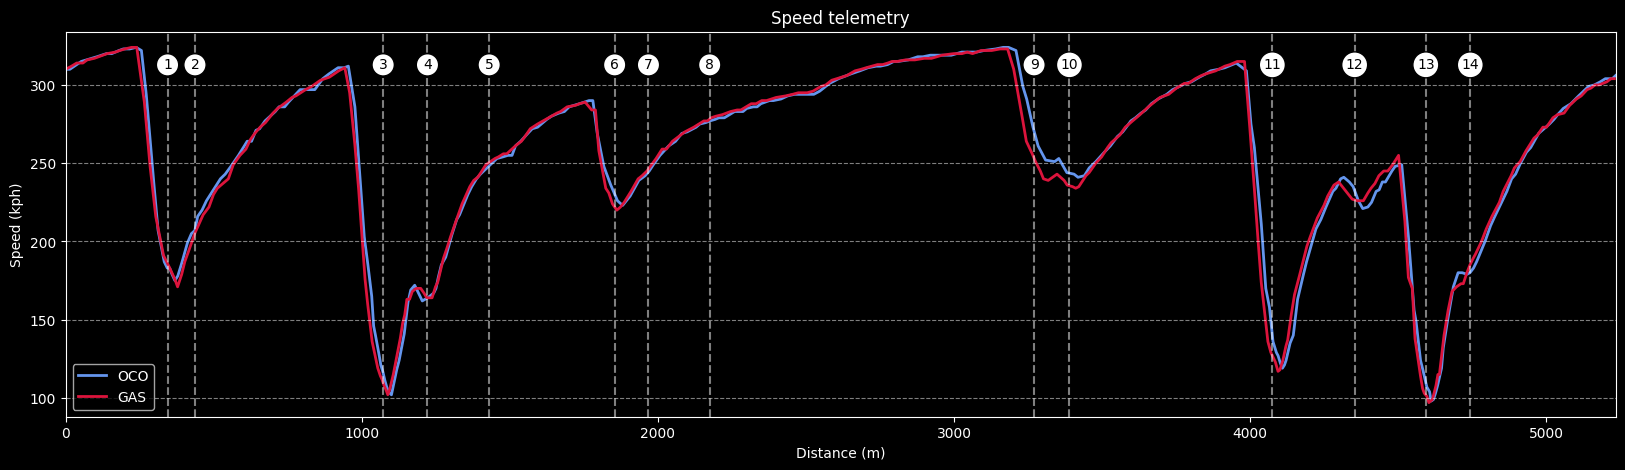

In [541]:
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot()
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Speed (kph)')
plt.title('Speed telemetry')
ax = plot_lap_telemetry(
    tel_d1,
    tel_d2,
    'Speed',
    ax,
    y_padding=10,
    file_name="internal_speed"
)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 3000x1000 with 0 Axes>

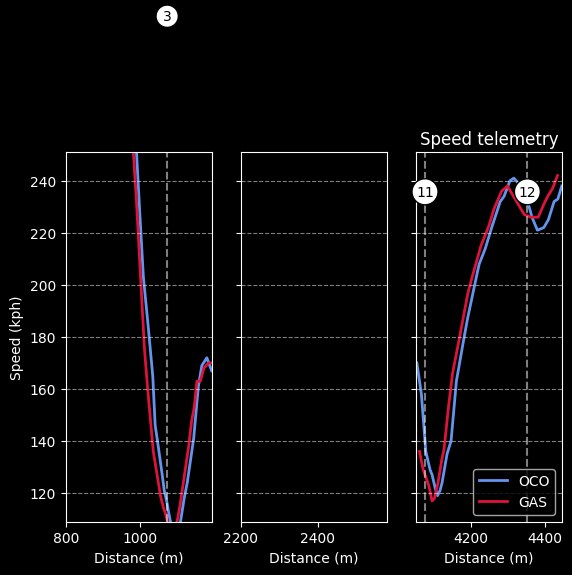

In [542]:
distances = [
    (800, 1200),
    (2200, 2600),
    (4050, 4450)
]

fig = plt.figure(figsize=(10 * len(distances), 10))
fig, axes = plt.subplots(ncols=len(distances), sharey=True)
for i, (min_d, max_d) in enumerate(distances):
    axes[i].set_xlabel('Distance (m)')
    axes[i] = plot_lap_telemetry(
        tel_d1,
        tel_d2,
        'Speed',
        axes[i],
        y_padding=10,
        min_distance=min_d,
        max_distance=max_d
    )
    axes[i].set_ylabel(None)
axes[0].set_ylabel('Speed (kph)')
plt.title('Speed telemetry')

plt.show()

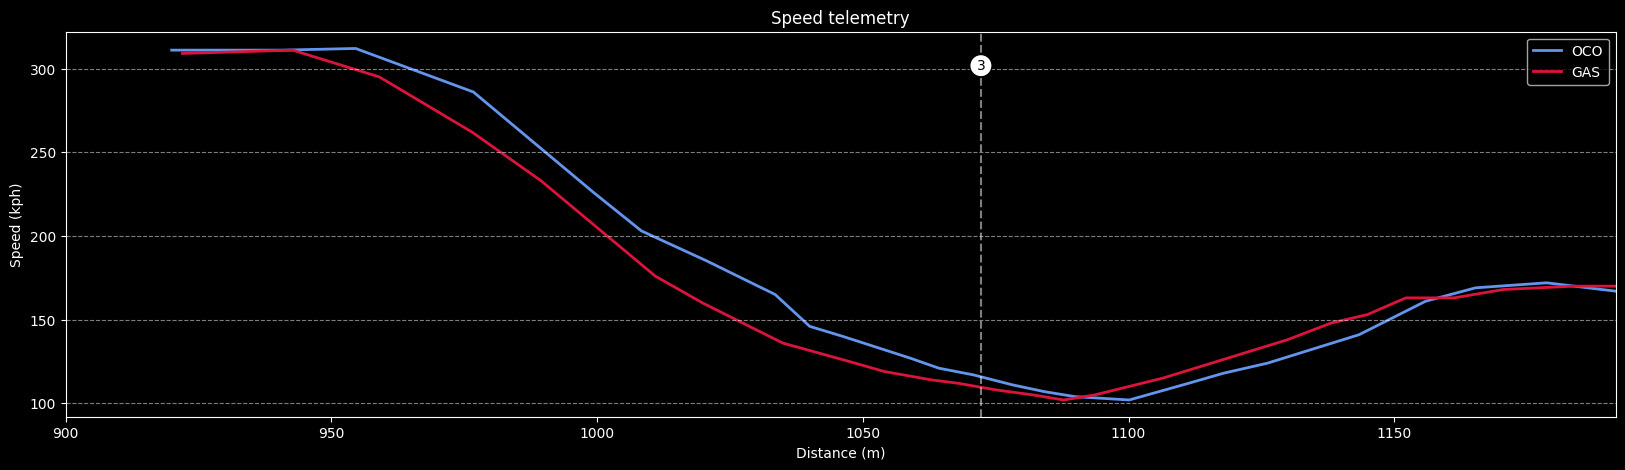

In [543]:
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot()
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Speed (kph)')
plt.title('Speed telemetry')
ax = plot_lap_telemetry(
    tel_d1,
    tel_d2,
    'Speed',
    ax,
    y_padding=10,
    min_distance=900,
    max_distance=1200
)
plt.show()

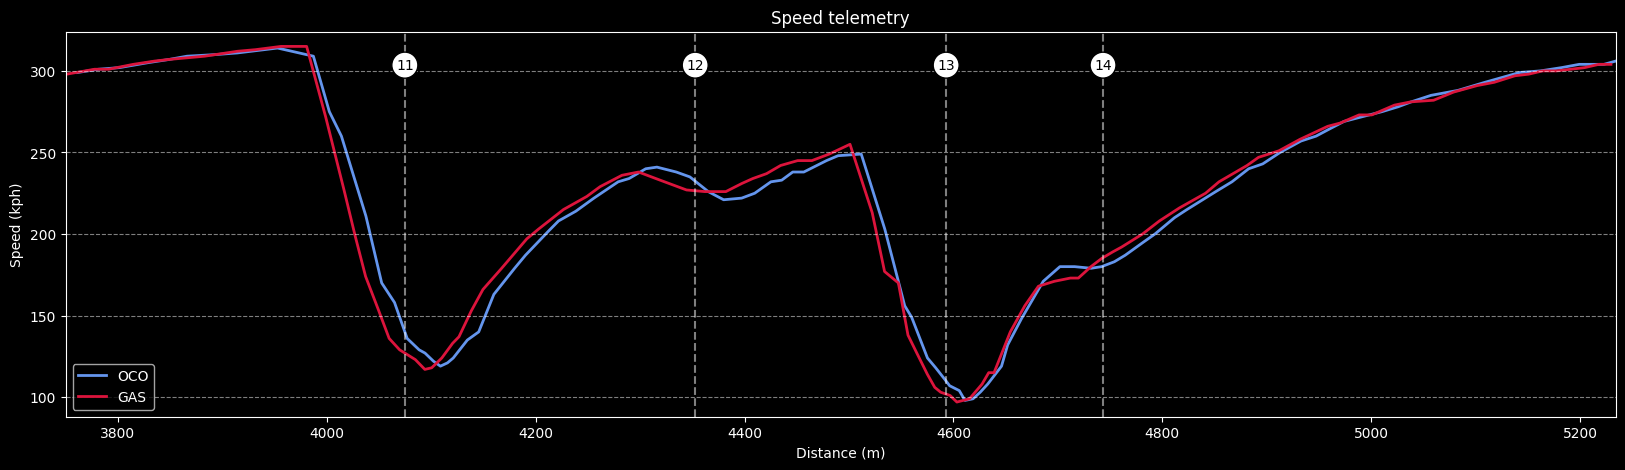

In [544]:
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot()
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Speed (kph)')
plt.title('Speed telemetry')
ax = plot_lap_telemetry(
    tel_d1,
    tel_d2,
    'Speed',
    ax,
    y_padding=10,
    min_distance=3750,
)
plt.show()

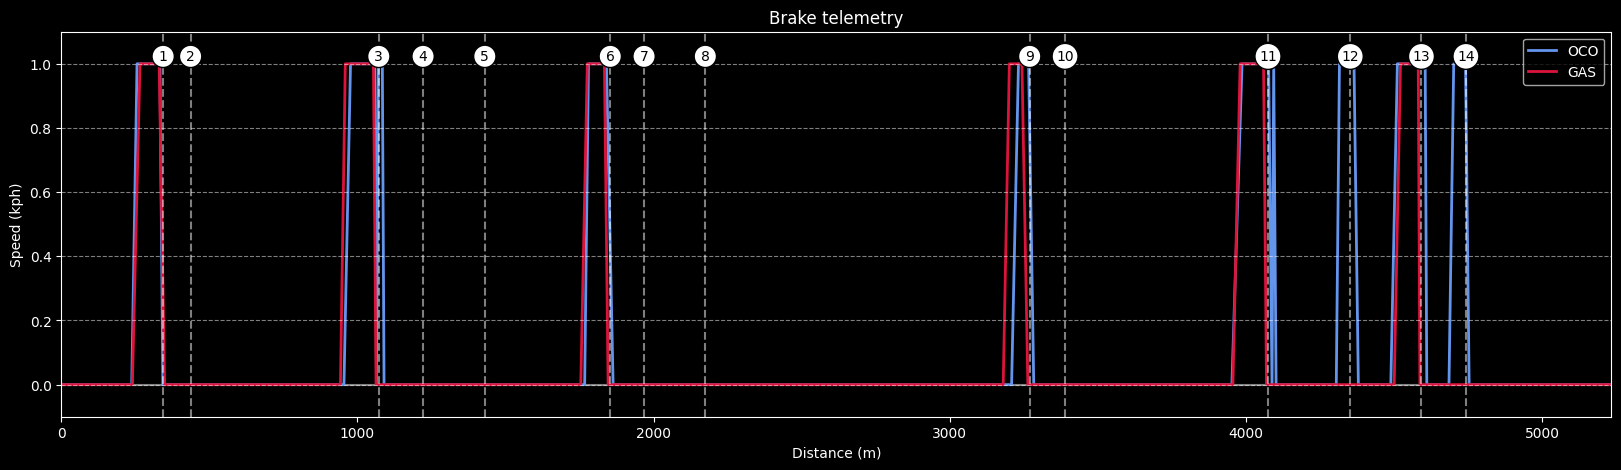

In [545]:
plt.figure(figsize=(20, 5))
ax = plt.subplot()
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Brake (%)')
plt.title('Brake telemetry')
ax = plot_lap_telemetry(
    tel_d1,
    tel_d2,
    'Brake',
    ax,
    y_padding=0.1,
    file_name="internal_brake"
)
plt.show()

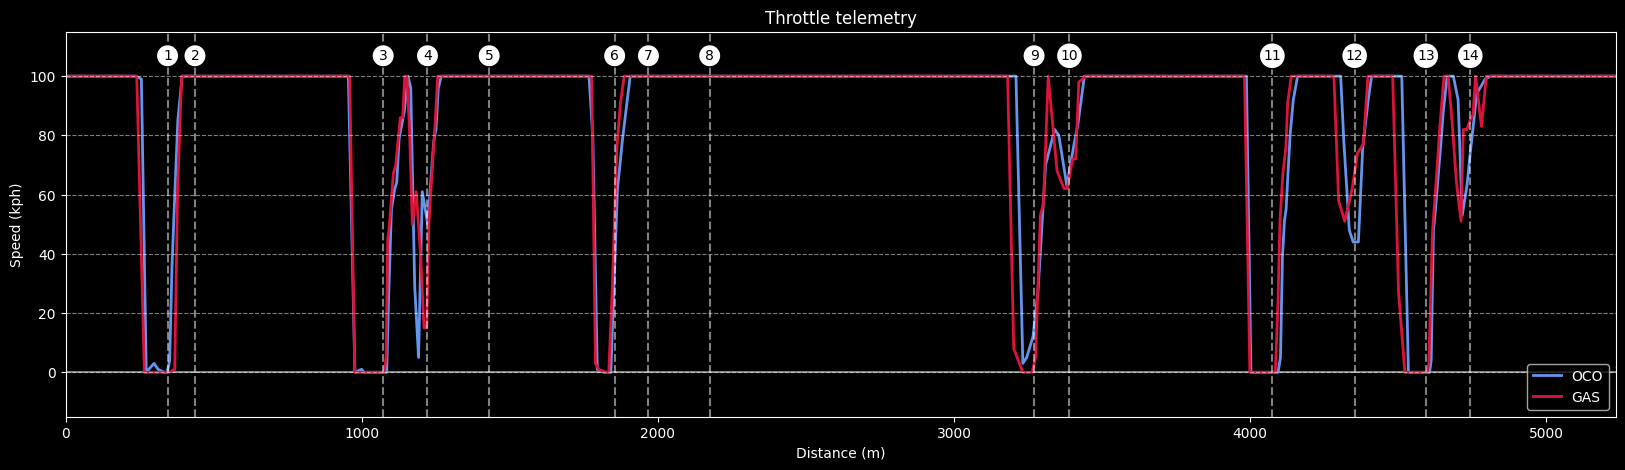

In [546]:
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot()
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Throttle (%)')
plt.title('Throttle telemetry')
ax = plot_lap_telemetry(
    tel_d1,
    tel_d2,
    'Throttle',
    ax,
    y_padding=15,
    file_name="internal_throttle"
)
plt.show()

# Comparison between the team and others

In [547]:
# Take Q1 end as session cut off
q1 = q.laps[q.laps['Time'] < q._session_split_times[1]]

q1_fastests = pd.DataFrame(
    [q1.pick_team(t).pick_fastest() for t in q.laps['Team'].unique() if t != team] +
        [
            q1.pick_driver(driver_1).pick_fastest(),
            #q1.pick_driver(driver_2).pick_fastest()
            q1.pick_driver(driver_2).pick_quicklaps().iloc[-1]
        ]
)

q1_fastests.sort_values('LapTime', inplace=True)  
q1_fastests['LapTimeSeconds'] = q1_fastests['LapTime'].dt.total_seconds()
q1_fastests['S1'] = q1_fastests['Sector1Time'].dt.total_seconds()
q1_fastests['S2'] = q1_fastests['Sector2Time'].dt.total_seconds()
q1_fastests['S3'] = q1_fastests['Sector3Time'].dt.total_seconds()

q1_fastests['Color'] = q1_fastests['Team'].apply(plotting.team_color)

/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_2198/1670870957.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


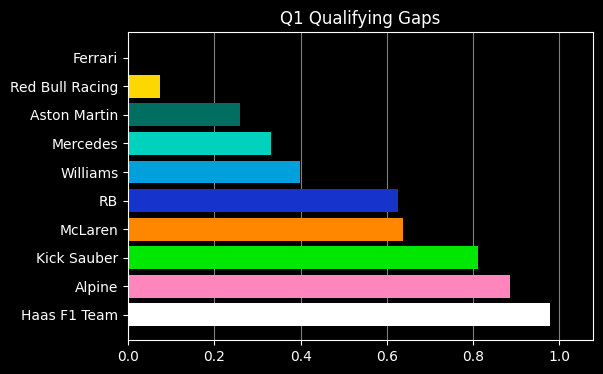

In [548]:
padding_right = 0.1
q1_teams = q1_fastests.groupby('Team').first().reset_index().sort_values('LapTime')

q1_teams['DeltaFastest'] = q1_teams['LapTimeSeconds'] - q1_teams.iloc[0]['LapTimeSeconds']

fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
plt.gca().invert_yaxis()

ax.barh(q1_teams['Team'], q1_teams['DeltaFastest'], color=q1_teams['Color'], zorder=2)

ax.grid(axis='x', zorder=0, alpha=0.5)
ax.set_xlim(left=q1_teams['DeltaFastest'].min(), right=q1_teams['DeltaFastest'].max() + padding_right)
ax.set_title('Q1 Qualifying Gaps')
fig.savefig(directory_path + '/q1_gaps')
fig.show()

In [549]:
compared_lap = q1_fastests[q1_fastests['Team'] == team].iloc[0]

q1_fastests['S1Delta'] = q1_fastests['S1'] - compared_lap['S1']
q1_fastests['S2Delta'] = q1_fastests['S2'] - compared_lap['S2']
q1_fastests['S3Delta'] = q1_fastests['S3'] - compared_lap['S3']

other_laps = q1_fastests[q1_fastests['Team'] != team]

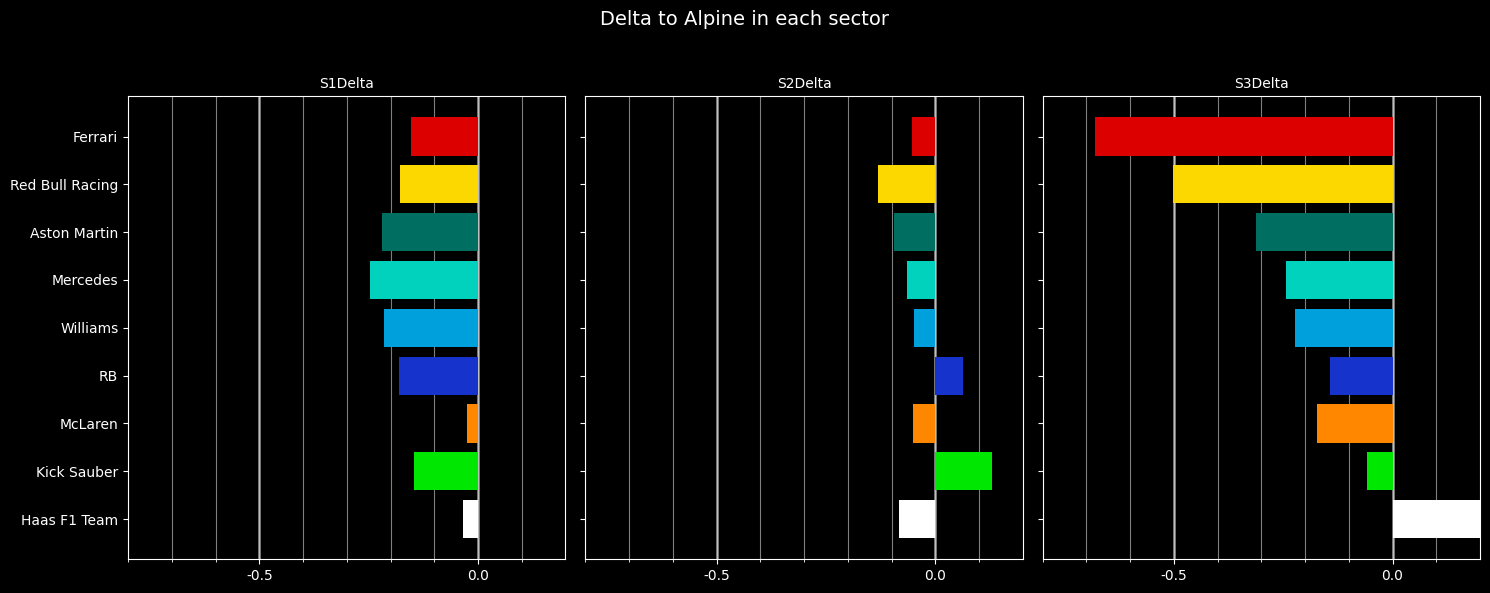

In [550]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np  # Ensure numpy is imported for arange function

# Assuming 'other_laps' is your DataFrame.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 6))  # Adjusted figsize for better visibility
plt.gca().invert_yaxis()

lim = (-0.8, 0.2)

def customize_axis(ax, lim, sector_name):
    ax.barh(other_laps['Team'], other_laps[sector_name], color=other_laps['Color'], zorder=2)
    ax.grid(axis='x', which='both', zorder=0, alpha=0.5)
    ax.set_xlim(lim)
    
    # Set major ticks
    major_ticks = [round(x, 2) for x in np.arange(-2, 2, 0.5) if x > lim[0] and x < lim[1]]
    minor_ticks = [round(x, 2) for x in np.arange(-2, 2, 0.1) if x > lim[0] and x < lim[1]]
    
    # Set major and minor locators
    ax.xaxis.set_major_locator(ticker.FixedLocator(major_ticks))
    ax.xaxis.set_minor_locator(ticker.FixedLocator(minor_ticks))
    
    # Generate dynamic labels for the major formatter
    major_labels = [f"{tick:.1f}" if tick in minor_ticks else "" for tick in major_ticks]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(major_labels))
    
    # Adding bolder lines at significant x values, e.g., x=0.5 and x=-0.5, within lim
    significant_xs = [x for x in major_ticks if lim[0] < x < lim[1]]
    for x in significant_xs:
        ax.axvline(x, color='grey', linewidth=2, zorder=1)  # Adjust color and linewidth as needed

    # Set subtitle for each axis
    ax.set_title(sector_name, fontsize=10)  # Adjust fontsize as needed

# Customize each axis with its name as subtitle
sectors = ['S1Delta', 'S2Delta', 'S3Delta']
for ax, sector_name in zip([ax1, ax2, ax3], sectors):
    customize_axis(ax, lim, sector_name)

# Set the overall title
fig.suptitle('Delta to Alpine in each sector', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the overall title
plt.savefig(directory_path + '/q1_gaps_sector', bbox_inches = "tight")
plt.show()


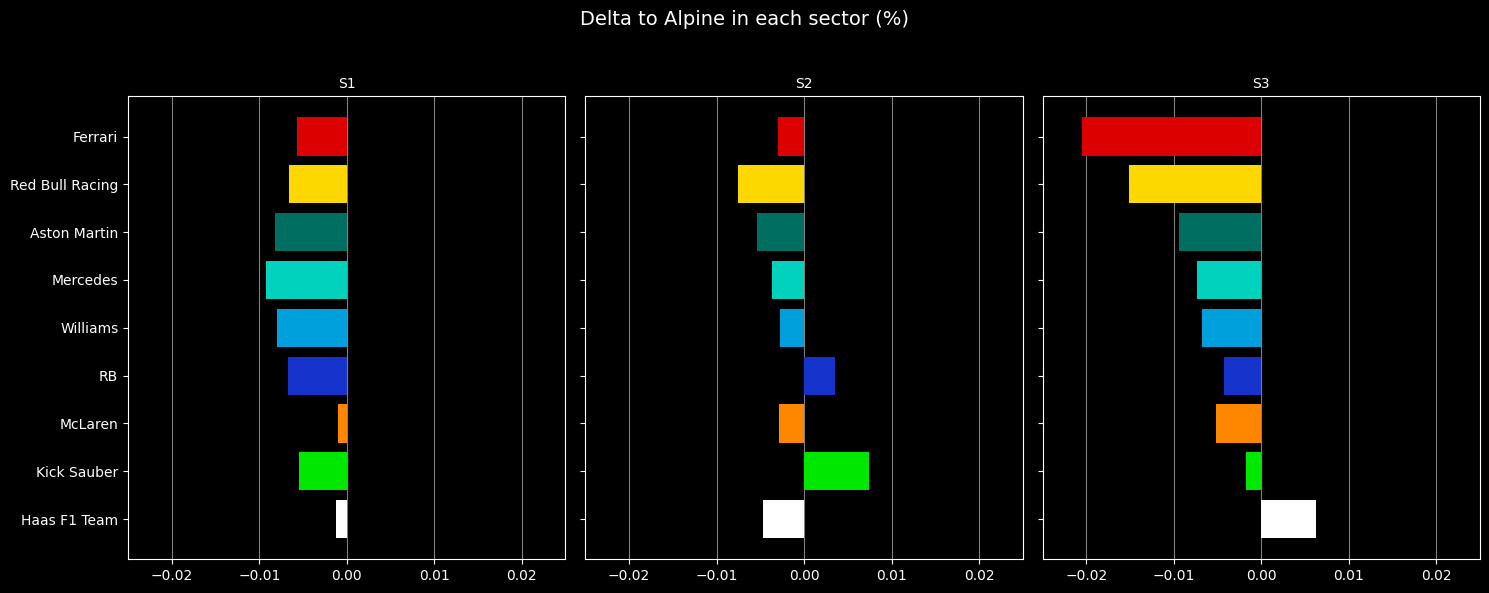

In [551]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np  # Ensure numpy is imported for arange function

# Assuming 'other_laps' is your DataFrame.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 6))  # Adjusted figsize for better visibility
plt.gca().invert_yaxis()

lim = (-0.025, 0.025)

def customize_axis(ax, lim, sector_name):
    ax.barh(other_laps['Team'], other_laps[sector_name] / compared_lap[sector_name] - 1, color=other_laps['Color'], zorder=2)
    ax.grid(axis='x', which='both', zorder=0, alpha=0.5)
    ax.set_xlim(lim)
    
    # Set major ticks
    #ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(-0.6, 0.7, 0.1)))
    #ax.xaxis.set_minor_locator(ticker.FixedLocator([-0.5, 0.5])) 
    #ax.xaxis.set_major_formatter(ticker.FixedFormatter(["", "-0.5", "", "", "", "", "0", "", "", "", "", "0.5"]))

    # Adding bolder lines at x=0.5 and x=-0.5
    #ax.axvline(-0.5, color='grey', linewidth=2, zorder=1)  # Adjust color and linewidth as needed
    #ax.axvline(0.5, color='grey', linewidth=2, zorder=1)

    # Set subtitle for each axis
    ax.set_title(sector_name, fontsize=10)  # Adjust fontsize as needed

# Customize each axis with its name as subtitle
sectors = ['S1', 'S2', 'S3']
for ax, sector_name in zip([ax1, ax2, ax3], sectors):
    customize_axis(ax, lim, sector_name)

# Set the overall title
fig.suptitle('Delta to Alpine in each sector (%)', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the overall title
plt.savefig(directory_path + '/q1_gaps_sector_percent', bbox_inches = "tight")
plt.show()


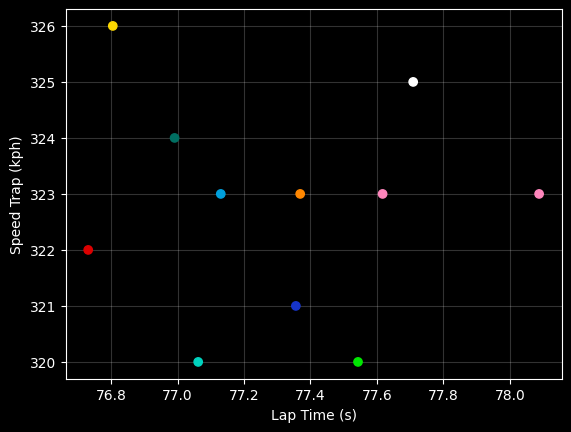

In [552]:
fig = plt.figure()
ax = plt.subplot()
ax.set_xlabel('Lap Time (s)')
ax.set_ylabel('Speed Trap (kph)')
ax.grid(alpha=0.2, zorder=0)
ax.scatter(q1_fastests['LapTimeSeconds'], q1_fastests['SpeedST'], color=q1_fastests['Color'], zorder=10)
plt.savefig(directory_path + '/top_speed', bbox_inches = "tight")

In [553]:
def get_axis_label(column):
    match column:
        case 'Speed':
            return 'Speed (km/h)'
        case 'Throttle':
            return 'Throttle pedal pressure (%)'
        case 'Brake':
            return 'Brakes applied or not'
        case _:
            return column

def plot_lap_telemetry_multi(datas, column, colors, labels, ax = None, min_distance = -np.Infinity, max_distance = np.Infinity, y_padding = 0, corner_numbers = True, file_name = None):
    if ax == None:
        ax = plt.subplot()
    
    for (i, data) in enumerate(datas):
        data = data[(data['Distance'] > min_distance) & (data['Distance'] < max_distance)]
        
        min_y = min(data[column] - y_padding)
        max_y = max(data[column] + y_padding)

        min_x = max(0, min_distance)
        max_x = min(max(data['Distance']), max_distance)

        ax.plot(
            data['Distance'],
            data[column],
            color=colors[i],
            linewidth=1,
            zorder=1,
            label = labels[i]
        )

    i = 0
    for corner_distance in corners:
        i += 1
        if (corner_distance < min_distance) | (corner_distance > max_distance):
            continue
        ax.vlines(corner_distance, min_y, max_y, linestyles='dashed', alpha=0.5)
        if corner_numbers:
            ax.text(
                corner_distance,
                max_y * 0.95,
                f'{i}',
                color='black',
                verticalalignment='top',
                horizontalalignment='center',
                bbox=dict(facecolor='white', alpha=1, boxstyle='circle', edgecolor='black')
                )

    ax.hlines(0, 0, max_x, zorder=-1, alpha=0.5)

    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    plt.legend(loc='lower right')
    ax.set_ylabel(get_axis_label(column))
    if file_name != None:
        plt.savefig(directory_path + '/' + file_name, bbox_inches = "tight")
    return ax


fig = plt.figure(figsize=(20, 5))
ax = plt.subplot()
ax = plot_lap_telemetry_multi(
    [
        q1.pick_team(team).pick_fastest().get_telemetry(),
        q1.pick_team('RB').pick_fastest().get_telemetry(),
        q1.pick_team('Williams').pick_fastest().get_telemetry(),
    ],
    'Speed',
    [
        plotting.team_color('Alpine'),
        plotting.team_color('RB'),
        plotting.team_color('Williams')
    ],
    ax,
    y_padding = 15
)

In [554]:
def plot_time_delta(ax, deltas, distances, labels, colors, min_distance = -np.Infinity, max_distance = np.Infinity, y_padding = 0, corner_numbers = True, file_name = None):
    max_i = len(distances)
    min_i = 0
    for i, distance in enumerate(distances):
        if distance > min_distance:
            min_i = i
            break
    for i, distance in enumerate(reversed(distances)):
        if distance < max_distance:
            max_i = len(distances) - i
            break
    
    min_y = min([min(delta[min_i: max_i]) for delta in deltas])
    max_y = max([max(delta[min_i: max_i]) for delta in deltas])

    min_x = max(min_distance, 0)
    for (i, delta) in enumerate(deltas):
        max_x = min(max(distances), max_distance)

        ax.plot(
            distances,
            delta,
            color=colors[i],
            linewidth=1,
            zorder=1,
            label=labels[i]
        )

    i = 1
    for corner_distance in corners:
        ax.vlines(corner_distance, min_y, max_y, linestyles='dashed', alpha=0.5)
        if corner_numbers:
            ax.text(
                corner_distance,
                max_y * 0.95,
                f'{i}',
                color='black',
                verticalalignment='top',
                horizontalalignment='center',
                bbox=dict(facecolor='white', alpha=1, boxstyle='circle', edgecolor='black')
                )
        i += 1

    ax.hlines(0, 0, max_x, zorder=-1, alpha=0.5)

    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Delta Time (s)')
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y - y_padding, max_y + y_padding)
    if file_name != None:
        plt.savefig(directory_path + '/' + file_name, bbox_inches = "tight") 
    return ax

def plot_telemetry(df, ref_team, others, min_distance = -np.Infinity, max_distance = np.Infinity, file_name = None, metric = 'Speed'):
    deltas = []
    distances = None
    telemetry = []
    colors = []
    labels = [ref_team] + others
    for (i, other) in enumerate(others):
        delta, t1, t2 = utils.delta_time(
            df.pick_team(ref_team).pick_fastest(),
            df.pick_team(other).pick_fastest()
        )
        if i == 0:
            telemetry.append(t1)
            distances = t1['Distance']
            colors.append(plotting.team_color(ref_team))
        deltas.append(delta)
        telemetry.append(t2)
        colors.append(plotting.team_color(other))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    ax1 = plot_lap_telemetry_multi(
        telemetry,
        metric,
        colors,
        labels,
        ax1,
        y_padding = 15,
        min_distance=min_distance,
        max_distance=max_distance)
    ax2 = plot_time_delta(
        ax2, deltas, distances, labels[1:], colors[1:], y_padding=0.1,
        corner_numbers=False, min_distance=min_distance,
        max_distance=max_distance
        )
    ax1.set_title('Comparison between bottom 5 teams')
    plt.legend(loc='lower right')
    if file_name != None:
        plt.savefig(directory_path + '/' + file_name, bbox_inches = "tight")
    plt.show()

/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/Caskroom

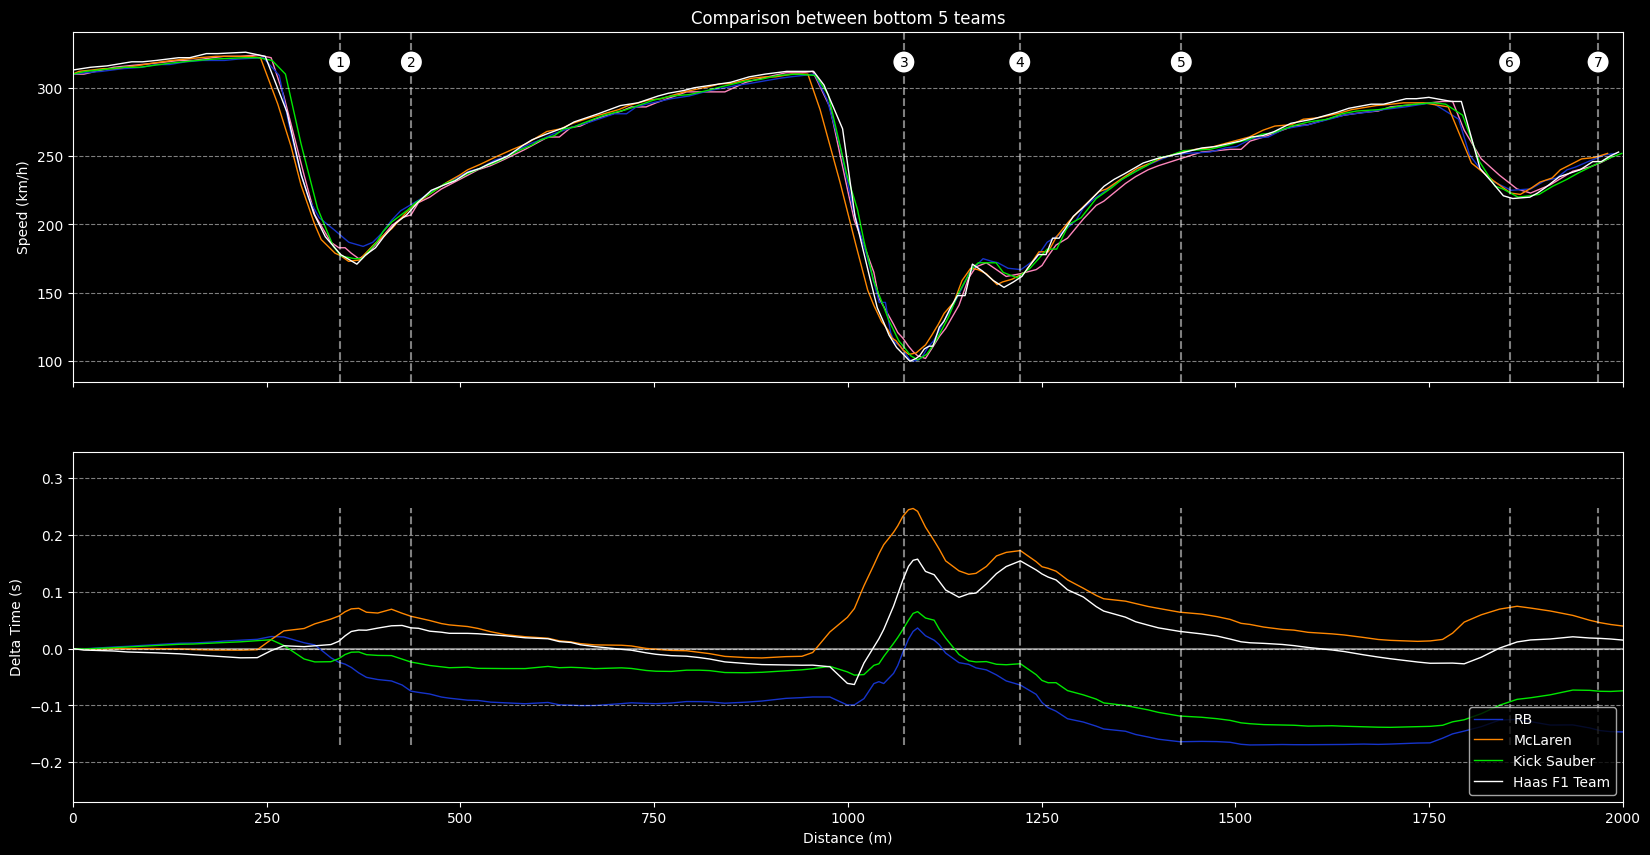

/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/Caskroom

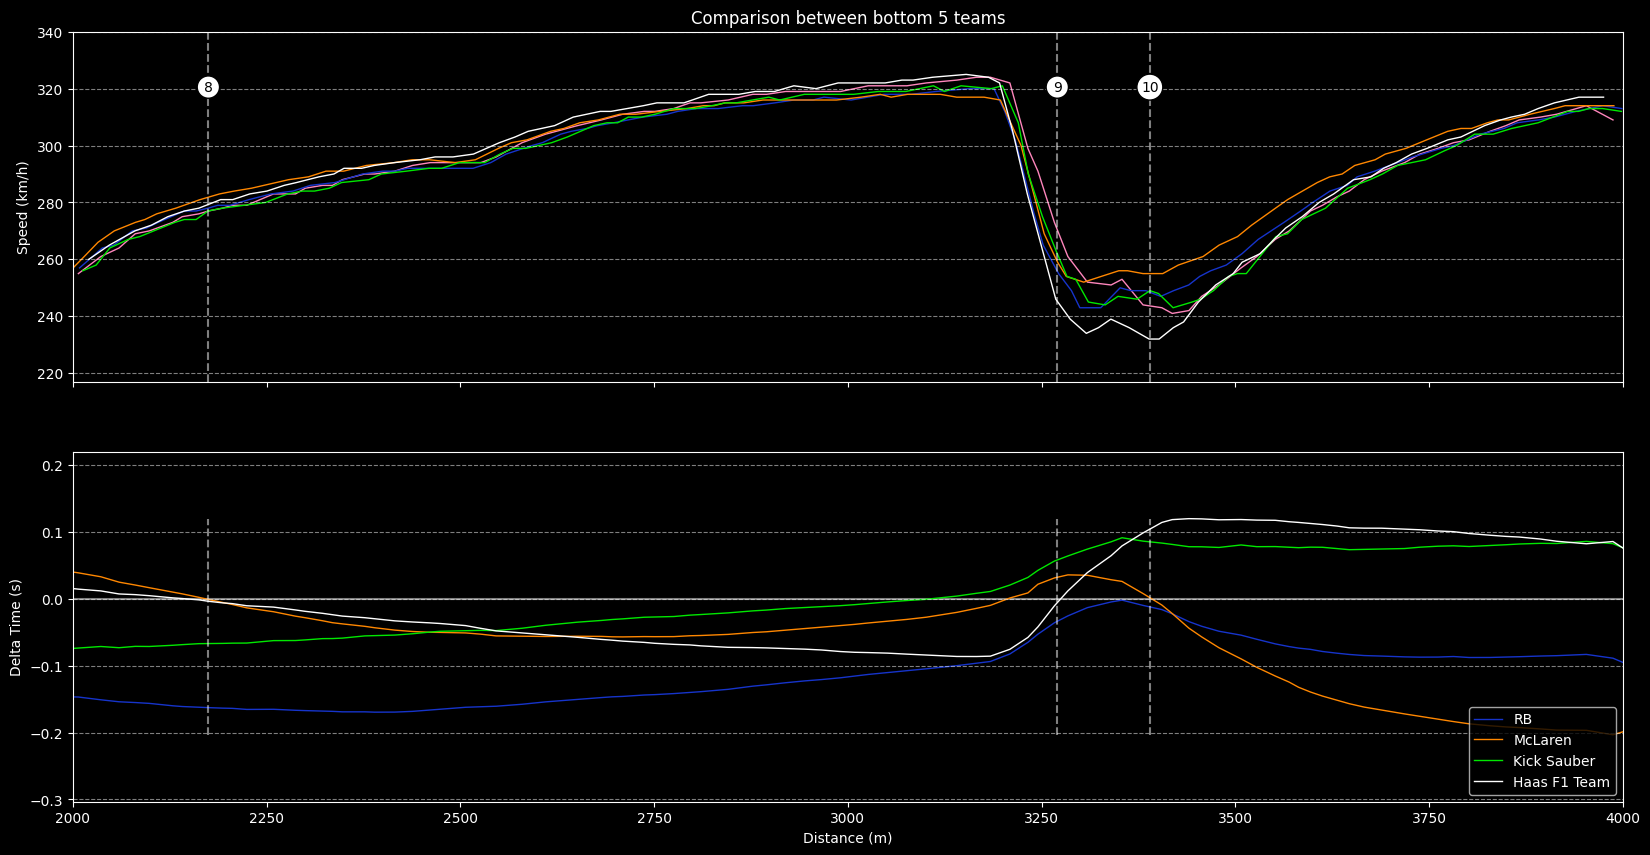

/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/Caskroom

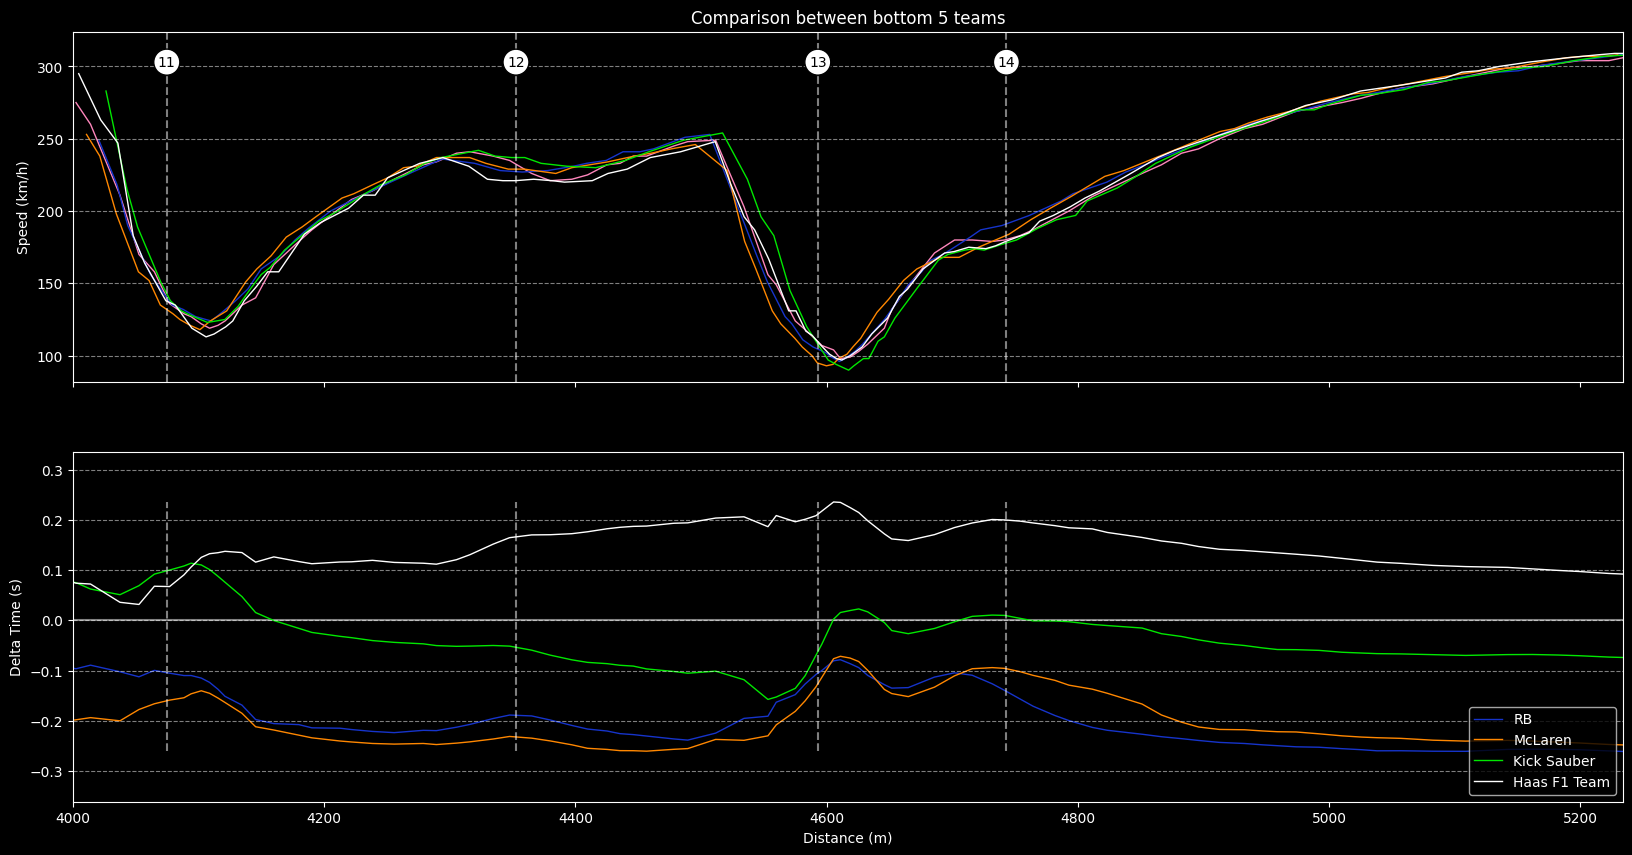

In [555]:
# Sector 1
plot_telemetry(
    q1,
    team,
    q1_fastests[q1_fastests['Team'] != team]['Team'][5:].to_list(),
    max_distance=2000,
    file_name='telemetry_s1'
)
# Sector 2
plot_telemetry(
    q1,
    team,
    q1_fastests[q1_fastests['Team'] != team]['Team'][5:].to_list(),
    min_distance=2000,
    max_distance=4000,
    file_name='telemetry_s2'
)
# Sector 3
plot_telemetry(
    q1,
    team,
    q1_fastests[q1_fastests['Team'] != team]['Team'][5:].to_list(),
    min_distance=4000,
    file_name='telemetry_s3'
)

In [556]:
def pedal_plot(telemetry, ax, min_distance = -np.Infinity, max_distance = np.Infinity):
    colors = [
        'red' if brake else 'green' if throttle == 100 else 'gray'
        for brake, throttle in zip(telemetry['Brake'], telemetry['Throttle'])
    ]
    # Previous end of rectangle (start at 0)
    prev_end = 0

    for i, (dist, color) in enumerate(zip(telemetry['Distance'], colors)):
        ax.fill_betweenx([0, 1], prev_end, prev_end + dist, color=color)
        prev_end += dist

    ax.set_xlim(max(min_distance, 0), min(max_distance, prev_end))
    ax.set_ylim(0, 1)
    ax.axis('off')
    return ax

def mul_pedal_plot(telemetry_list, ax, labels, min_distance = -np.Infinity, max_distance = np.Infinity):
    # Base y position and height for the rectangles, accounting for separation
    base_y = 0
    height = (1 - 0.05 * (len(telemetry_list) - 1)) / len(telemetry_list)

    for i, telemetry in enumerate(telemetry_list):
        colors = [
             'red' if brake
             else (0, throttle / 100, 0)
             for brake, throttle in zip(telemetry['Brake'], telemetry['Throttle'])
        ]
        # Previous end of rectangle (start at 0)
        prev_end = 0

        for dist, color in zip(telemetry['Distance'], colors):
            ax.fill_betweenx([base_y, base_y + height], prev_end, dist, color=color, alpha = 1)
            prev_end = dist

        # Label the dataset
        ax.text(max(min_distance, 0) - 15, base_y + height / 2, labels[i], va='center')

        if i < len(telemetry_list) - 1:
            ax.axhline(y=base_y + height + 0.025, color='white', linestyle='-', linewidth=0.5)

        # Move up the base y position for the next dataset, including separation
        base_y += height + 0.05
    ax.set_xlim(max(min_distance, 0), min(max_distance, prev_end))
    ax.set_ylim(0, 1)
    ax.axes.get_yaxis().set_visible(False)

In [573]:
def telemetry_comparison_with_delta(d1, d2, c1, c2, title, columns, file_name = None, min_distance = -np.Infinity, max_distance = np.Infinity):
    delta, t1, t2 = utils.delta_time(
    q1.pick_driver(d1).pick_fastest(),
    #q1.pick_driver(d2).pick_fastest()
    q1.pick_driver(d2).pick_quicklaps().iloc[-1]
    )
    print("WARNING PICKING LAST LAP NOT QUICK LAP")

    deltas = [delta]
    distances = t1['Distance']
    telemetry = [t1, t2]
    colors = [c1, c2]
    labels = [d1, d2]

    height_ratio = [0.3 if column == 'Pedals' else 0.5 if column == 'nGear' else 1 for column in columns] + [1] # delta subplot

    fig, axes = plt.subplots(1 + len(columns), 1, figsize=(20, 10), sharex=True, height_ratios=height_ratio)
    delta_ax = axes[-1]
    for i, ax in enumerate(axes[:-1]):
        if columns[i] == 'Pedals':
            ax = mul_pedal_plot(telemetry, ax, labels, min_distance=min_distance, max_distance=max_distance)
            continue
        ax = plot_lap_telemetry_multi(
            telemetry,
            columns[i],
            colors,
            labels,
            ax,
            y_padding = 5 if columns[i] != "nGear" else 0,
            min_distance=min_distance,
            max_distance=max_distance,
            corner_numbers= i == 0
            )
        ax.legend()
    delta_ax = plot_time_delta(
        delta_ax, deltas, distances, labels[1:], colors[1:], y_padding=0.00,
        corner_numbers=False,
        min_distance=min_distance,
        max_distance=max_distance
        )
    axes[0].set_title(title)
    plt.legend(loc='lower right')
    if file_name != None:
        plt.savefig(directory_path + '/' + file_name, bbox_inches = "tight")
    plt.show()

/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


WARNING PICKING LAST LAP NOT QUICK LAP


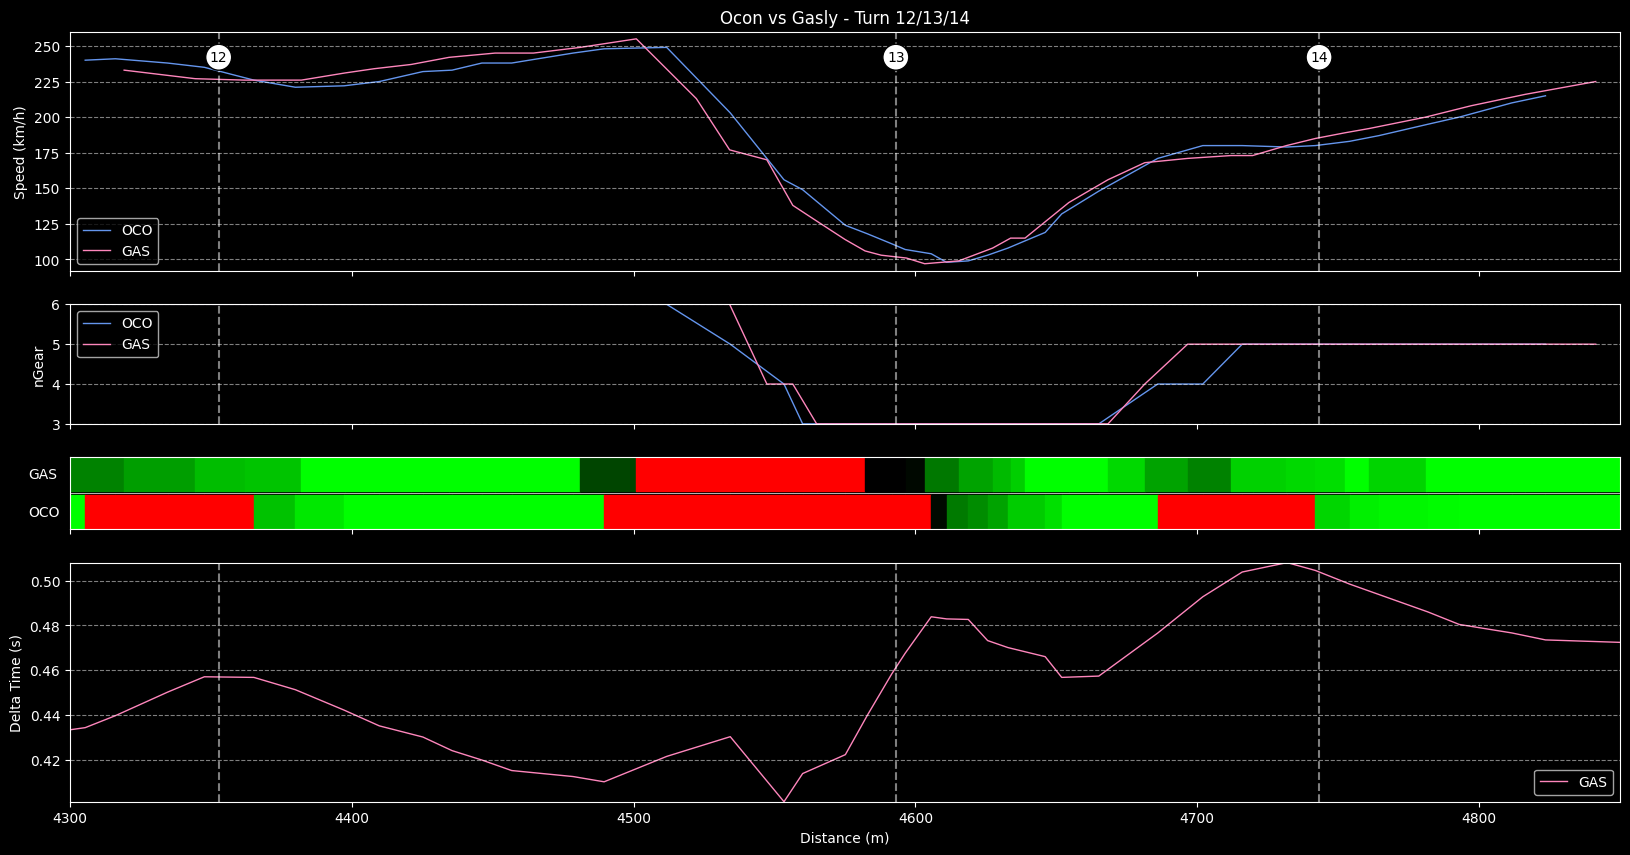

In [584]:
telemetry_comparison_with_delta(
    driver_1, driver_2, 
    'cornflowerblue', plotting.driver_color(driver_2), 
    'Ocon vs Gasly - Turn 12/13/14',
    ['Speed', 'nGear','Pedals'],
    min_distance=4300,
    max_distance=4850,
    file_name="turn_12"
    )

/usr/local/Caskroom/miniconda/base/envs/gpt/lib/python3.11/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


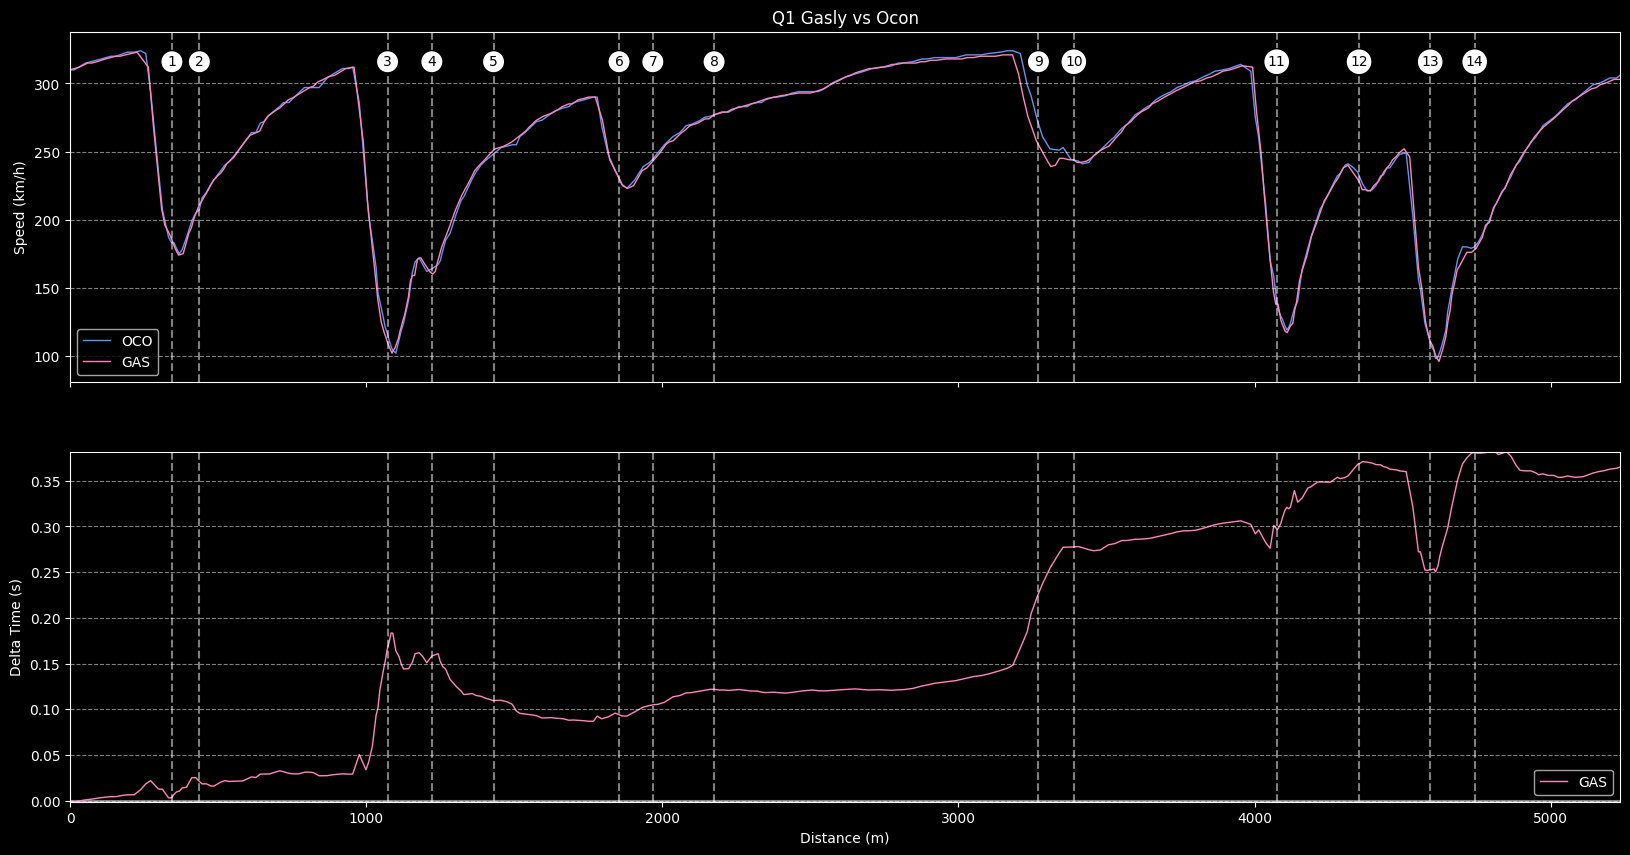

In [559]:
delta, t1, t2 = utils.delta_time(
    q1.pick_driver(driver_1).pick_fastest(),
    q1.pick_driver(driver_2).pick_fastest()
)

deltas = [delta]
distances = t1['Distance']
telemetry = [t1, t2]
colors = ['cornflowerblue', plotting.driver_color(driver_2)]
labels = [driver_1, driver_2]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
ax1 = plot_lap_telemetry_multi(
    telemetry,
    'Speed',
    colors,
    labels,
    ax1,
    y_padding = 15)
ax1.legend()
ax2 = plot_time_delta(
    ax2, deltas, distances, labels[1:], colors[1:], y_padding=0.0,
    corner_numbers=False
    )
ax1.set_title('Q1 Gasly vs Ocon')
plt.legend(loc='lower right')
plt.savefig(directory_path + '/q1_ocon_gasly_2', bbox_inches = "tight")
plt.show()